In [1]:
# Imports
# !pip install torchinfo
import torch
import torch.nn as nn
import torch.utils.data as Data
from torchvision import datasets, transforms
from torchinfo import summary
import matplotlib.pyplot as plt
import os
# os.environ['OPENBLAS_NUM_THREADS'] = '1'
import numpy as np
import random
import time
import TrainerVTS_V08F3 as TP
import DataSetting_v5 as DS

In [2]:
gpu = 1
date = '20240915'
name = f'{date}_Env'
data_path = ['../dataset/Door_EXP/A208',
             '../dataset/Door_EXP/A308',
             '../dataset/Door_EXP/B211',
             '../dataset/Door_EXP/C605_new']
level = 'env'

data_organizer = DS.DataOrganizer(name, data_path, level)
data_organizer.load()
torch.set_warn_always(False)

Cross validation plan at env level
Loading ../dataset/Door_EXP/A208...

Loaded 0709A23-csi.npy of shape (111248, 30, 3)
Loaded 0709A41-csi.npy of shape (248817, 30, 3)
Loaded 0709A24-csi.npy of shape (38347, 30, 3)
Loaded 0709A20-csi.npy of shape (209993, 30, 3)
Loaded 0709A14-csi.npy of shape (168611, 30, 3)
Loaded 0709A12-csi.npy of shape (151822, 30, 3)
Loaded 0709A02-csi.npy of shape (232687, 30, 3)
Loaded 0709A11-csi.npy of shape (219643, 30, 3)
Loaded 0709A50-csi.npy of shape (133412, 30, 3)
Loaded 0709A511-csi.npy of shape (62914, 30, 3)
Loaded 20240709_153519-rimg.npy of shape (4057, 128, 226)
Loaded 20240709_154950-rimg.npy of shape (6302, 128, 226)
Loaded 20240709_161802-rimg.npy of shape (3442, 128, 226)
Loaded 20240709_185105-rimg.npy of shape (6481, 128, 226)
Loaded 20240709_192745-rimg.npy of shape (7787, 128, 226)
Loaded 20240709_193501-rimg.npy of shape (3267, 128, 226)
Loaded 20240709_191754-rimg.npy of shape (5395, 128, 226)
Loaded 20240709_163045-rimg.npy of shape (6

In [3]:
print(data_organizer.total_segment_labels)

         env subject              bag      csi  group  segment      timestamp  \
0       A208    wang  20240709_164411  0709A30    0.0      0.0  1720511055239   
1       A208    wang  20240709_164411  0709A30    0.0      0.0  1720511055305   
2       A208    wang  20240709_164411  0709A30    0.0      0.0  1720511055372   
3       A208    wang  20240709_164411  0709A30    0.0      0.0  1720511055439   
4       A208    wang  20240709_164411  0709A30    0.0      0.0  1720511055506   
...      ...     ...              ...      ...    ...      ...            ...   
203423  C605   zhang  20240805_172537  0805D20    5.0     21.0  1722846665766   
203424  C605   zhang  20240805_172537  0805D20    5.0     21.0  1722846665833   
203425  C605   zhang  20240805_172537  0805D20    5.0     21.0  1722846665900   
203426  C605   zhang  20240805_172537  0805D20    5.0     21.0  1722846665966   
203427  C605   zhang  20240805_172537  0805D20    5.0     21.0  1722846666000   

       img_inds csi_inds  U

### Teacher

In [5]:
# data_organizer.batch_size = 1
preprocess = DS.Preprocess(new_size=(128, 128))

torch.cuda.set_device(gpu)
#data_organizer.gen_plan(subset_ratio=0.1, save=True)
data_organizer.load_plan('../dataset/Door_EXP/env_r0.1.pkl')

Loaded plan!


Generating loaders for t: level = env, current test = C605
 Train dataset length = 15783
 Test dataset length = 4559
 Exported train loader of len 197, batch size = 64
 Exported valid loader of len 49, batch size = 64
 Exported test loader of len 4559, batch size = 1

==========20240915_Env_C605 Teacher Training starting==========


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 1 out of 5. Decay rate = 0.5


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 2 out of 5. Decay rate = 0.25


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 3 out of 5. Decay rate = 0.125


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 4 out of 5. Decay rate = 0.0625


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 1 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 2 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 3 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 4 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 5 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 6 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 7 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 8 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 9 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 10 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 11 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 12 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 13 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 14 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 15 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 16 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 17 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 18 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 19 out of 20


  0%|          |[00:00<?]

  0%|          |[00:00<?]


Early Stopping reporting: 20 out of 20
Lr decay reporting: 5 out of 5. Decay rate = 0.03125Early Stopping triggered. Saving @ epoch 300...

Total training time: 42556.13318133354 sec


<Figure size 432x288 with 0 Axes>

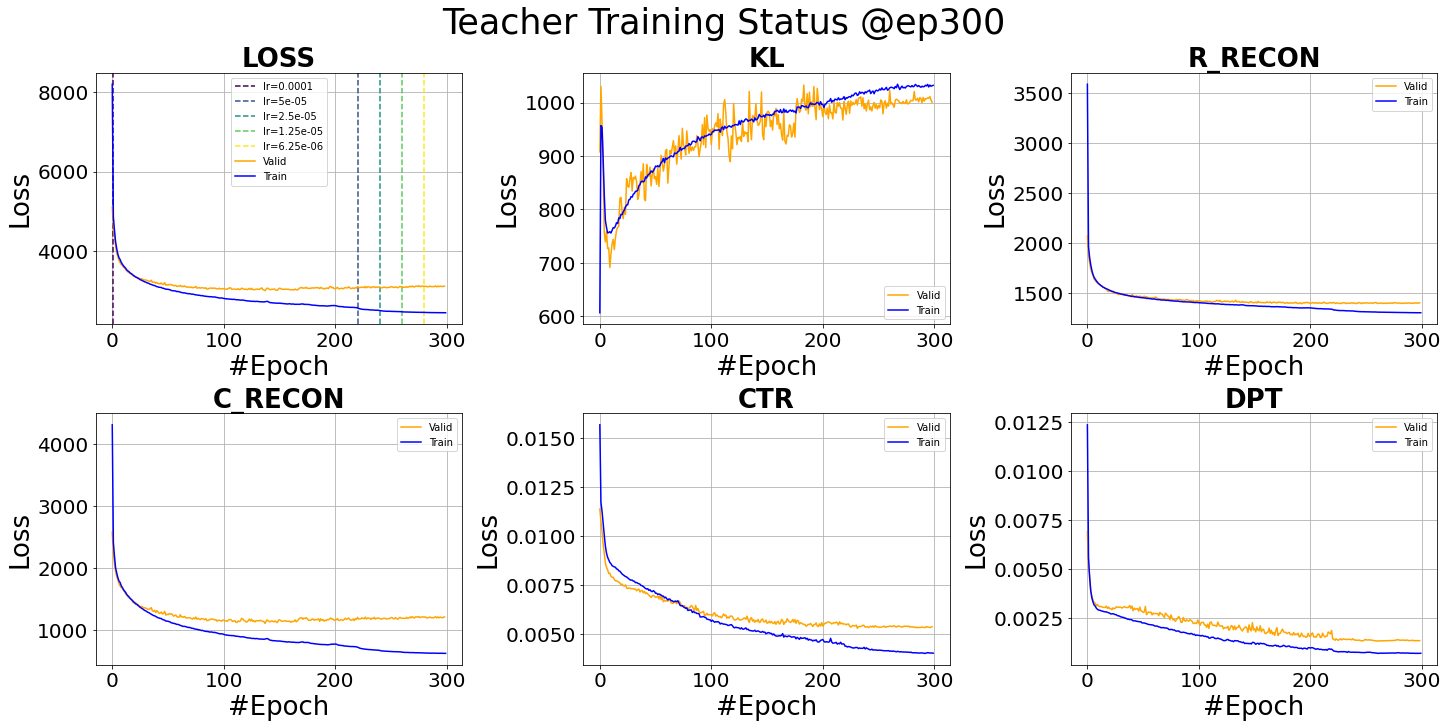

==========20240915_Env_C605 Teacher Test starting==========



  0%|          |[00:00<?]

/home/bob/.local/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/bob/.local/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Test finished. Average loss={'LOSS': 1942.4320957742366, 'KL': 16.111790396462236, 'R_RECON': 1302.8518667336043, 'C_RECON': 631.5196468937518, 'CTR': 0.004016977082206711, 'DPT': 0.0006947619727209391}

Total training time: 107.16288042068481 sec


<Figure size 1440x720 with 0 Axes>

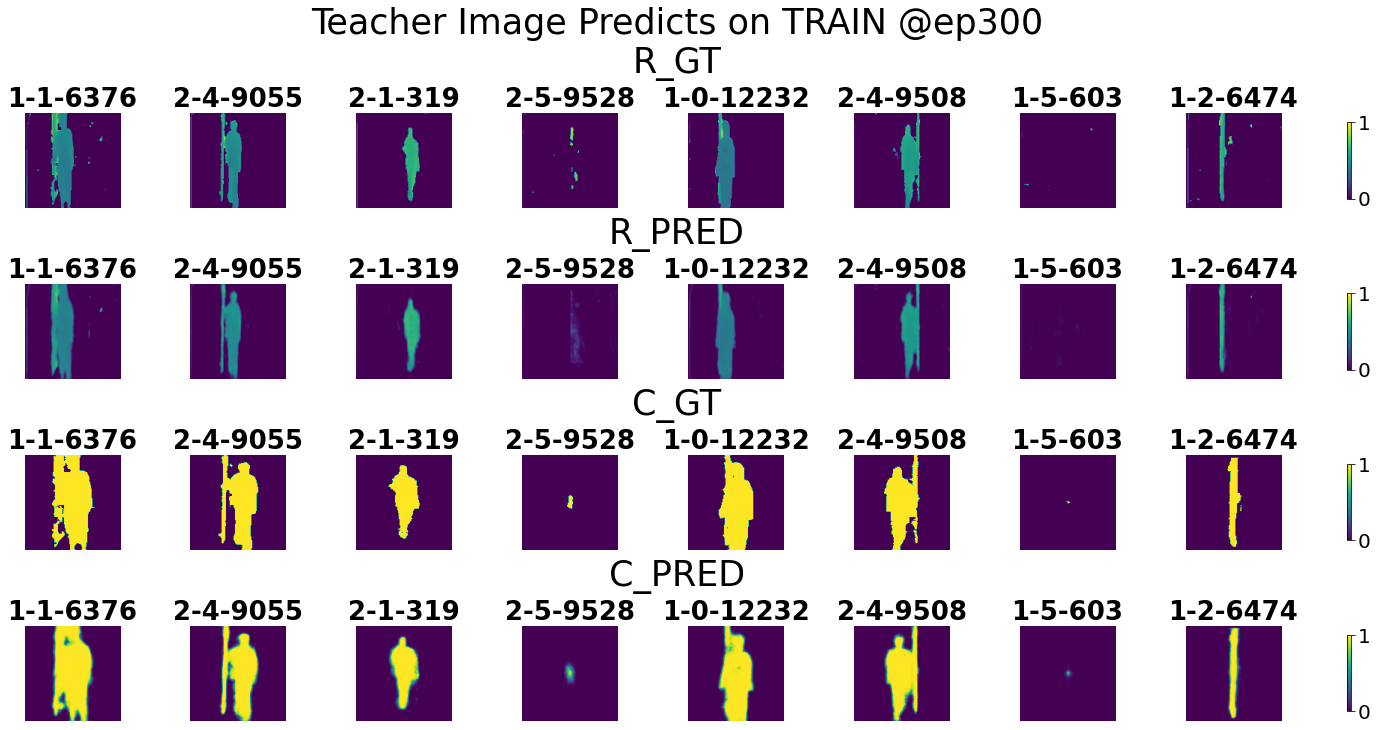

<Figure size 1440x720 with 0 Axes>

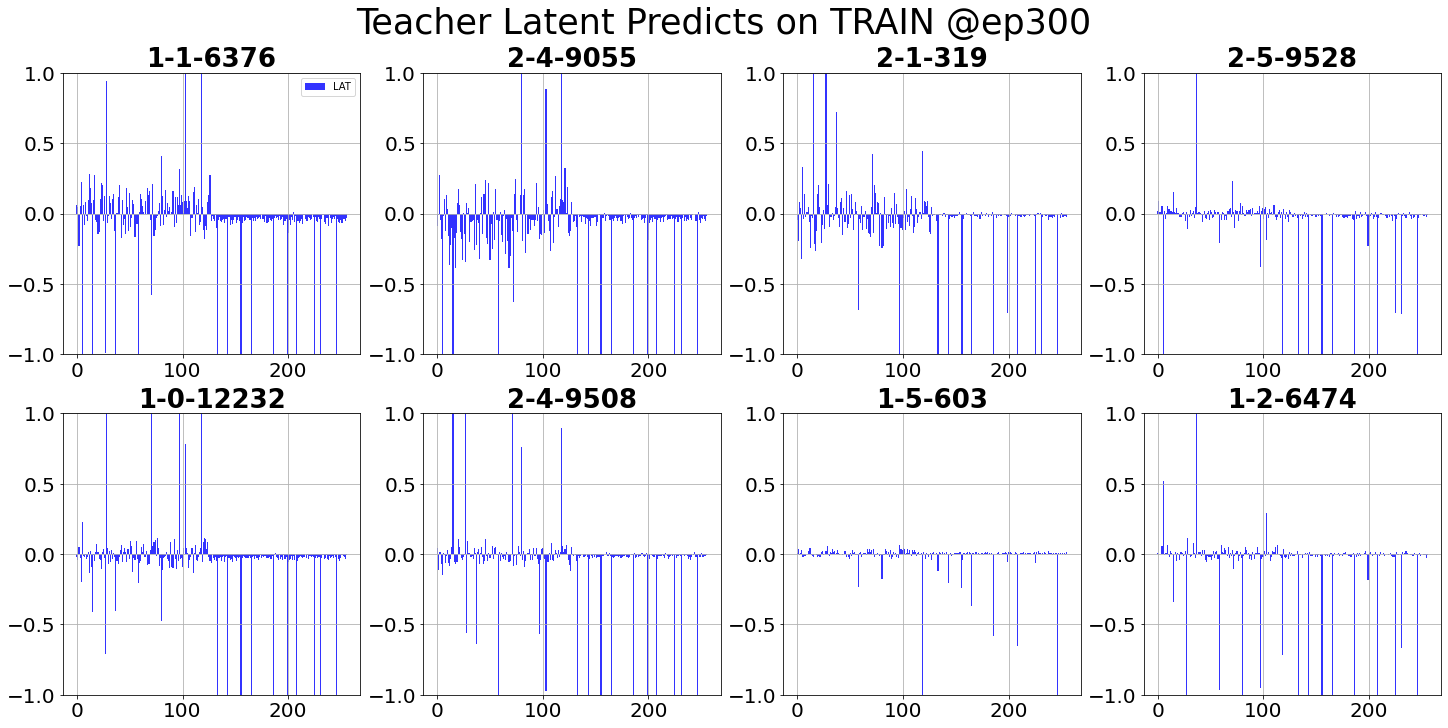

<Figure size 1440x720 with 0 Axes>

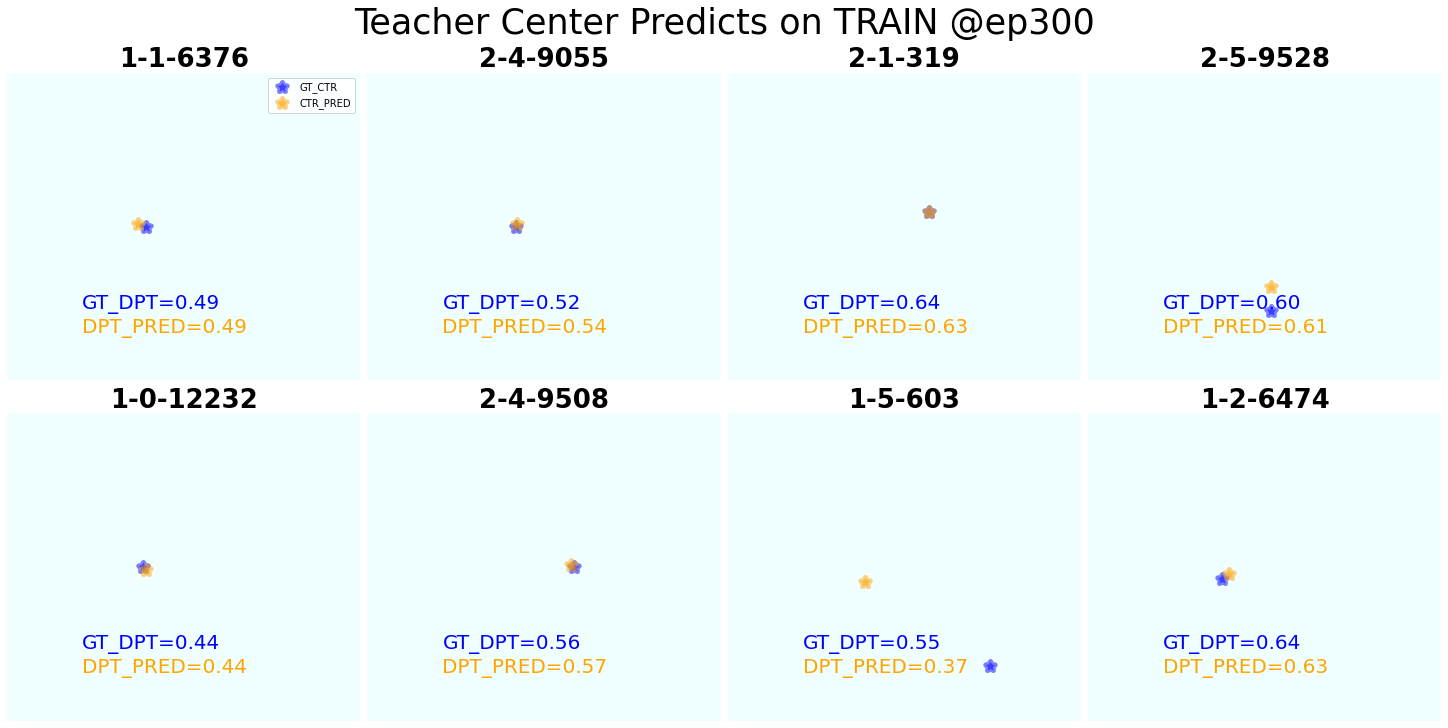

==========20240915_Env_C605 Teacher Test starting==========



  0%|          |[00:00<?]


Test finished. Average loss={'LOSS': 3122.188832165249, 'KL': 14.809679457691056, 'R_RECON': 1481.6836394765812, 'C_RECON': 1633.0808797101229, 'CTR': 0.013207739662187802, 'DPT': 0.0062882444573858845}

Total training time: 62.450079679489136 sec


<Figure size 1440x720 with 0 Axes>

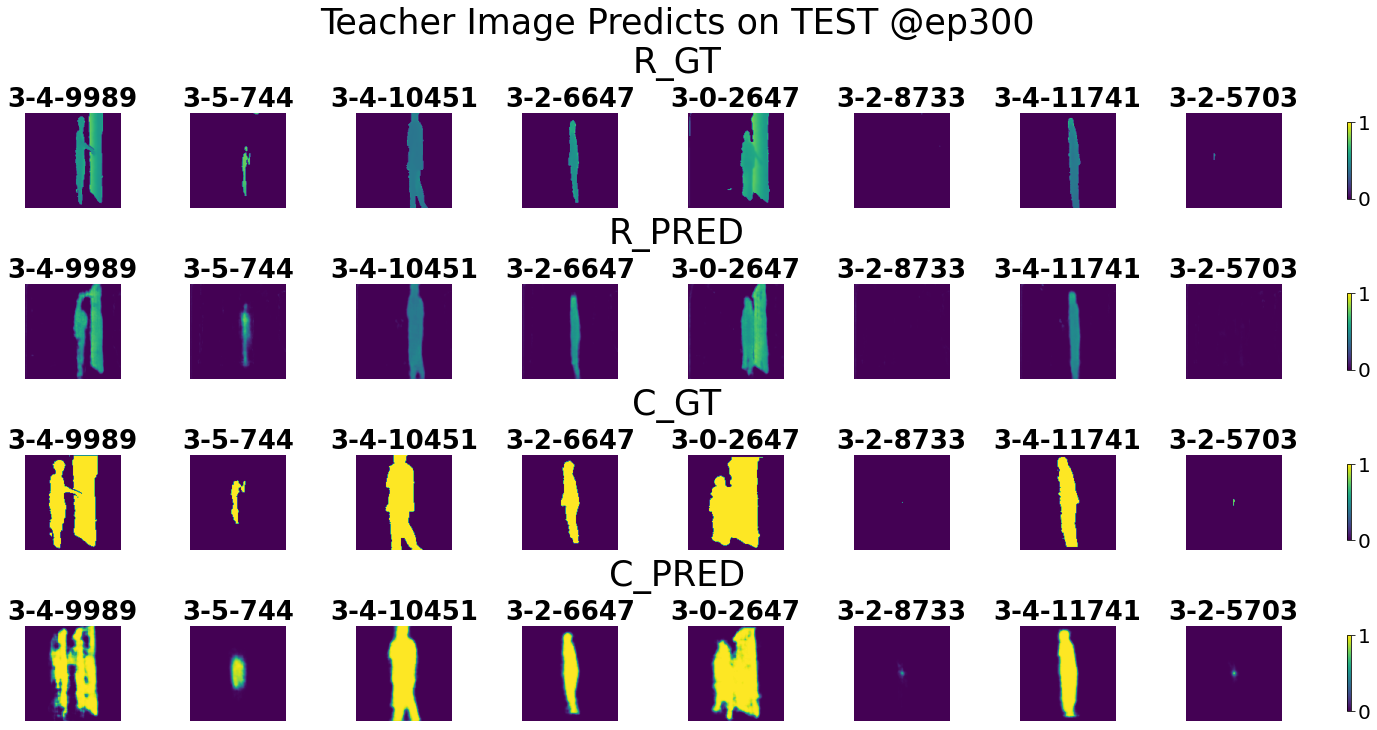

<Figure size 1440x720 with 0 Axes>

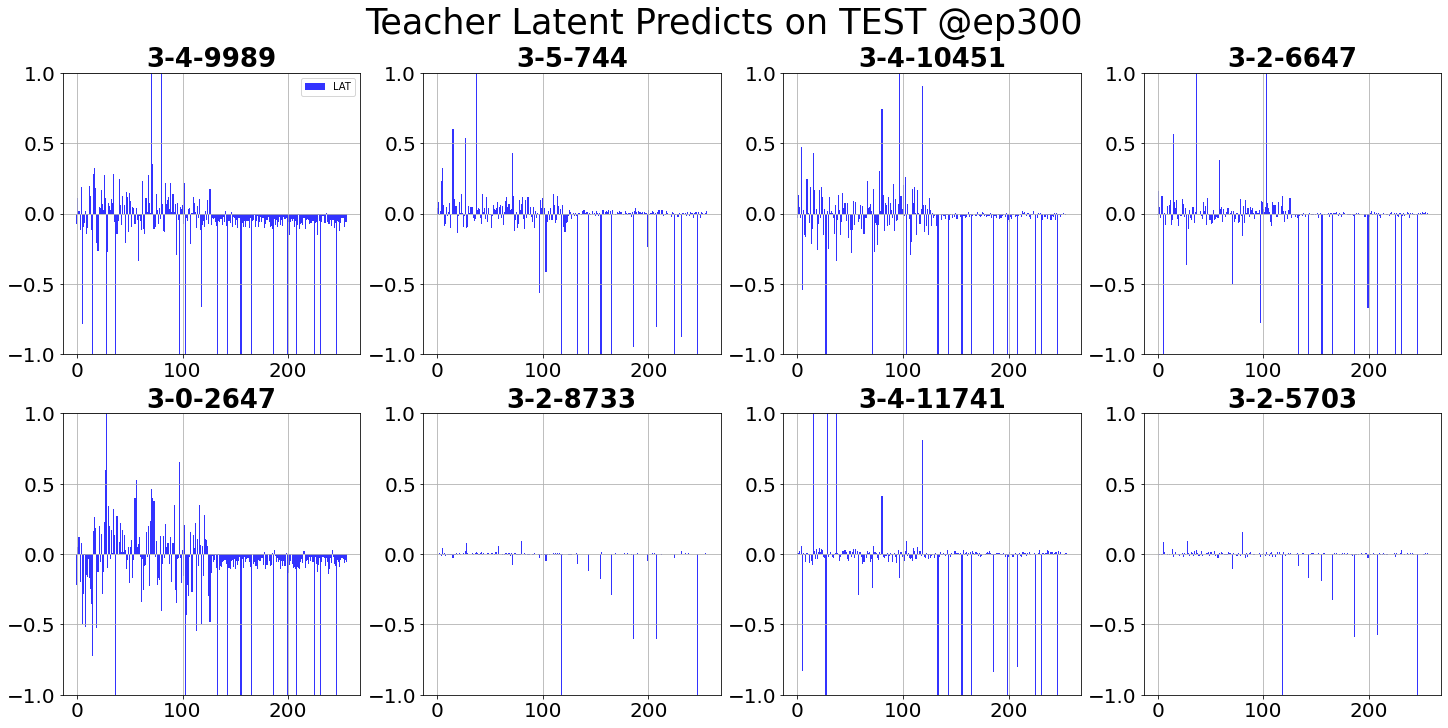

<Figure size 1440x720 with 0 Axes>

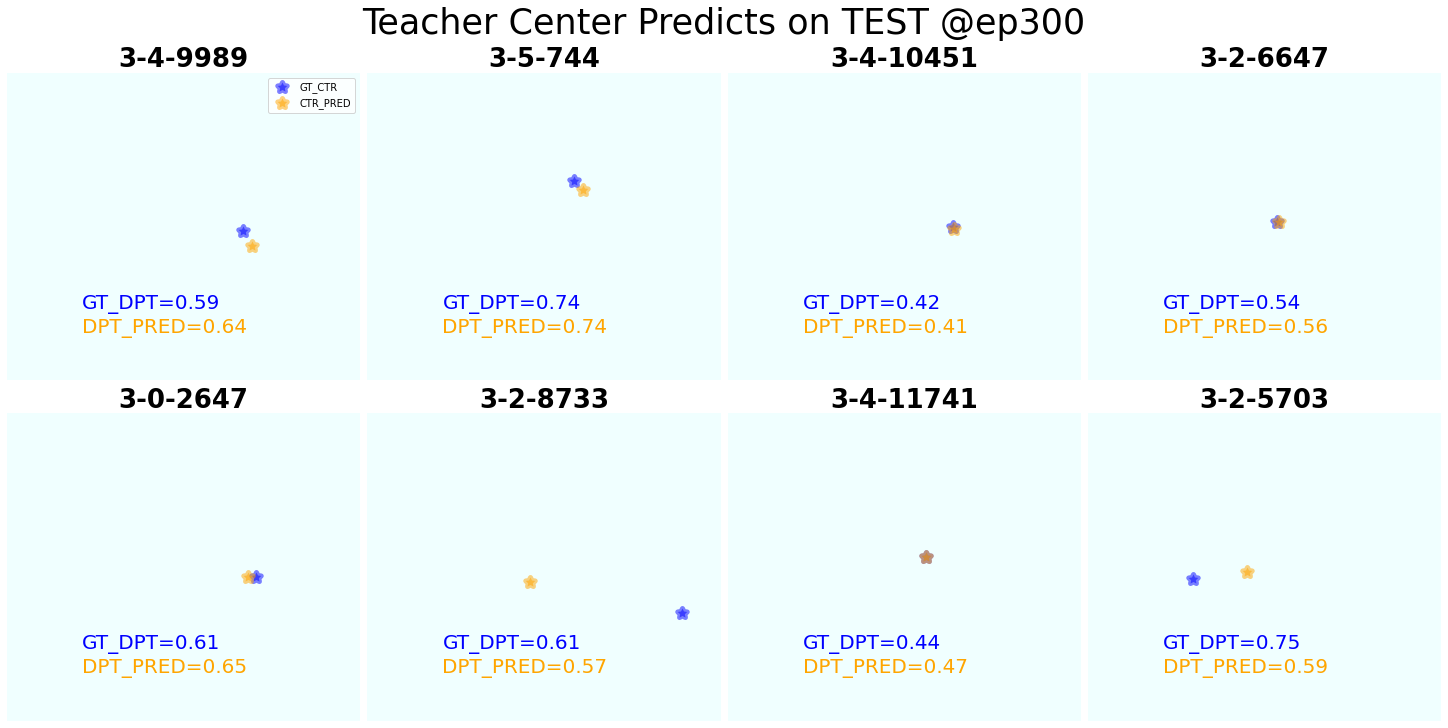

Saving preds: R_PRED...
Saving preds: C_PRED...
Saving preds: DPT_PRED...
Saving preds: CTR_PRED...
Saving preds: LAT...
Saving preds: TAG...
All saved!

Teacher schedule Completed!
Generating loaders for t: level = env, current test = A208
 Train dataset length = 14544
 Test dataset length = 5798
 Exported train loader of len 181, batch size = 64
 Exported valid loader of len 45, batch size = 64
 Exported test loader of len 5798, batch size = 1

==========20240915_Env_A208 Teacher Training starting==========


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

In [ ]:
for i in range(4):
    data_organizer.gen_plan(subset_ratio=0.1)
    train_loader, valid_loader, test_loader, current_test = data_organizer.gen_loaders(mode='t')

    T_trainer = TP.TeacherTrainer(beta=0.5,
                              name='Teacher',
                              loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                              lr=1e-4, epochs=10, cuda=gpu,
                                  preprocess = preprocess,
                              train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader,
                              notion=f'{name}_{current_test}')

    T_trained = T_trainer.schedule(lr_decay=True)

### Student

In [ ]:
preprocess = DS.Preprocess(new_size=(128, 128))

train_loader, valid_loader, test_loader, current_test = data_organizer.gen_loaders(mode='s', single_pd=True)

S_trainer = TP.StudentTrainer(name='Student',
                              lstm_steps = 75,
                              beta=0.5,
                              loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                              lr=1e-4, epochs=10, cuda=gpu,
                              preprocess = preprocess,
                              notion=f'{name}_{current_test}',
                              train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader,
                             )
S_trainer.models['imgen'].load_state_dict(torch.load(f"../saved/20240909_Env_A208/Teacher_imgen_best.pth"))
S_trainer.models['cimgde'].load_state_dict(torch.load(f"../saved/20240909_Env_A208/Teacher_cimgde_best.pth"))
S_trainer.models['rimgde'].load_state_dict(torch.load(f"../saved/20240909_Env_A208/Teacher_rimgde_best.pth"))
S_trainer.models['ctrde'].load_state_dict(torch.load(f"../saved/20240909_Env_A208/Teacher_ctrde_best.pth"))
S_trained = S_trainer.schedule(lr_decay=True, train_module={'csien'}, eval_module={'imgen', 'cimgde', 'rimgde', 'ctrde'})

Different env validation:
train = {'A308', 'C605', 'B211'},
test = A208

Generating loaders for s...
dict_keys(['csi', 'rimg', 'cimg', 'bbx', 'dpt', 'ctr', 'pd'])
 exported train loader of len 181, batch size = 64
 exported valid loader of len 45, batch size = 64
 exported test loader of len 5798, batch size = 1

==========20240909_Env_A208 Student Training starting==========


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

In [ ]:
print(data_organizer.data.keys())